### COMP 4448: Data Science Tools II						         Assignment 6

Name: Laura Contreras

Directions: Do this assignment in Jupyter Notebook and provide screenshots of code and output in this word document wherever required. You will upload this word document containing screenshots of code and answers as well as your Jupyter Notebook to Canvas. All assignments will be submitted and graded through canvas and grades will be transferred to the 2U platform. 
Goal: The goal of this assignment is to give you the opportunity to implement the Gradient Algorithm from scratch as well as using tools built into sklearn. You will also run regression analysis, evaluate, test assumptions and provide interpretations using your own data.
Packages: Core packages you may need for this assignment include numpy, pandas, sklearn, matplotlib.pyplot and/or seaborn. 


In [88]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from patsy import dmatrix
from numpy.linalg import inv
import seaborn as sns
import matplotlib.pyplot as plt

## Question 1

#### Importing and scaling the dataset

Use the entire health data provided on canvas for this question. Here are the first few rows of the data. 
The variables are described as follows:
age  =  Age in years divided by 100.
income = Annual income in tens of thousands of dollars.
illness = Number of illnesses in past 2 weeks.
reduced = Number of days of reduced activity in past 2 weeks due to illness or injury.
health = General health questionnaire score using Goldberg's method. Note that higher health scores indicate worse health condition. 
Use the age, income, illness and reduced variables as input variables and use the health variable as an output variable. You will find the parameters or coefficients (intercept and slopes) of a regression equation that models the relationship between the input and output variables. First use the StandardScaler() in sklearn to standardize the input data before you run your algorithm or fit your model. 

In [17]:
health = pd.read_csv("Health_Data.csv", skipinitialspace =True)

In [18]:
health.isnull().sum()

age        0
income     0
illness    0
reduced    0
health     0
dtype: int64

In [19]:
health.head(5)

,age,income,illness,reduced,health
0,0.19,0.55,1,4,1
1,0.19,0.45,1,2,1
2,0.19,0.90,3,0,0
3,0.19,0.15,1,0,0
4,0.19,0.45,2,5,1


In [20]:
## Utilize the standard scalar
for col in ['age', 'income', 'illness', 'reduced']:
    arr = np.array(health[col])
    scaler = StandardScaler()
    scaler.fit(arr.reshape(-1,1))
    health[col]=scaler.transform(arr.reshape(-1,1))

In [21]:
health.head(5)

,age,income,illness,reduced,health
0,-1.056765,-0.089896,-0.312123,1.086862,1
1,-1.056765,-0.360993,-0.312123,0.394185,1
2,-1.056765,0.858945,1.132944,-0.298492,0
3,-1.056765,-1.174285,-0.312123,-0.298492,0
4,-1.056765,-0.360993,0.410410,1.433200,1


### 1a)
Implement batch gradient descent from scratch to find the regression parameters as in the pseudo code below:

In [22]:
# implementing batch gradient decent
b0 = 0
b1 = 0
b2 = 0
b3 = 0
b4 = 0

n = len(health)
a = .01
iterations = 10000

for i in range(iterations):
    predicted_y = b0 + b1*health['age'] + b2*health['income'] + b3*health['illness'] + b4*health['reduced']
    errors =  health['health'] - predicted_y
    b0 = b0 + a*(1/n) * sum(errors)
    b1 = b1 + a*(1/n) * sum(errors*health['age'])
    b2 = b2 + a*(1/n) * sum(errors*health['income'])
    b3 = b3 + a*(1/n) * sum(errors*health['illness'])
    b4 = b4 + a*(1/n) * sum(errors*health['reduced'])
print(f"Coefficients b0: {b0}, b1: {b1}, b2: {b2}, b3: {b3}, b4: {b4}")

Coefficients b0: 1.2175337186897788, b1: -0.17273499897030503, b2: -0.10539057012366393, b3: 0.684909381277941, b4: 0.45714456103590073


### 1b) 
Now, use a vectorized or matrix implementation instead of having a line of code for each x or b. That mean, you can a create a vector of b’s and a feature matrix, X where you have an additional column for x0 whose values are 1’s. x0 corresponds to b0. You can still implement it as described in the code above. 

See the “Gradient Descent Vector/Matrix Implementation” document on canvas for additional tips


In [37]:
#initializing variables 
X = dmatrix("age + income + illness +reduced", health)[:]
y = np.array(health['health']).reshape(1,n)
n = len(health)
a = 0.01
iterations = 10000

# implementing batch gradient decent
b = np.array([0,0,0,0,0]).reshape(1,5)
x_t = np.vstack(X.T)

for i in range(iterations):
    predicted_y = np.matmul(b, x_t)
    errors = y - predicted_y
    b = b + a*(1/n)*np.sum(errors.T*x_t.T, axis=0)
print(b)

[[ 1.21753372 -0.172735   -0.10539057  0.68490938  0.45714456]]


### 1c)
Use the scikit-learn package to implement the stochastic gradient descent to find the parameters of the regression equation. 

In [43]:
from sklearn.linear_model import SGDRegressor

In [44]:
# Getting the data
y = health['health']
X = health.drop('health', axis = 1)

In [45]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
sgd.coef_

array([-0.18012626, -0.19927024,  0.66622554,  0.52367868])

The coefficients obtained from the SGDRegressor are similar to my results in a and in b.

## Question 2

### 2a) 
a)	Use the statsmodels package (https://www.statsmodels.org/stable/regression.html#examples) to implement a multiple linear regression using the entire health data to get a more detailed regression summary. 
Below is some pseudo code for implementation, see the documentation for details. 

In [46]:
import statsmodels.api as sm
y_Data = health['health']
X_Data = health.drop('health', axis = 1) 

In [47]:
feature_matrix = sm.add_constant(X_Data, prepend = False)
model = sm.OLS(y_Data, feature_matrix)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     282.9
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          2.35e-220
Time:                        10:28:43   Log-Likelihood:                -10762.
No. Observations:                5190   AIC:                         2.153e+04
Df Residuals:                    5185   BIC:                         2.157e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.1727      0.028     -6.120      0.0

### 2b)
Does the model fit the data overall? That is, do all the x’s overall explain a good amount of variance in health outcome? Use information from your results to support your answer. 

We obtained a low R2 (0.17) indicating that the model is not the best fit for the data. We have a very large F statistic indicating our variables are siginificant. When looking at our four input variables, we obtained a p value < 0.05 indcating they are significant. The prob (F-statistic) is less than 0.05 making it statisticaly significant. 

### 2c) 
Do age, income, illness and reduced variables individually  significantly predict health score? Use information from your summary of the regression results to support your answer.

We have a very large F statistic indicating our variables are siginificant. When looking at our four input variables, we obtained a p value < 0.05 indcating they are significant. 

### 2d)
Which variable is the best predictor of health score? Why? 

According to the summary above, the highest absolute coefficient is illness, 'X3, as it has 0.6849 coefficient and is also statistically significant with a pvalue < 0.05. 

### 2e)
Extract the residuals of the model and test the assumptions normality and homogeneity of variance for the regression model. Are the assumptions met? Use reg.resid syntax to extract the residuals.

In [49]:
res.resid

0      -0.692625
1      -0.404543
2      -1.949059
3      -1.173603
4      -1.374393
          ...   
5185   -0.539141
5186    0.717322
5187    0.006814
5188   -0.257493
5189   -0.203060
Length: 5190, dtype: float64

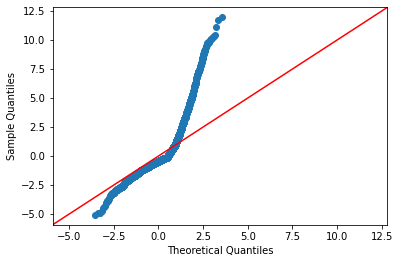

In [59]:
sm.qqplot(res.resid, line = '45')
plt.show()

<AxesSubplot:>

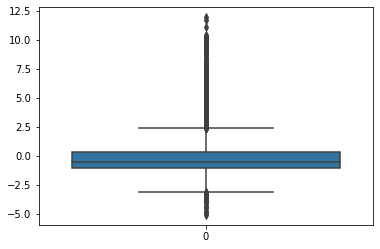

In [63]:
sns.boxplot(data = res.resid)

C:\Users\15599\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

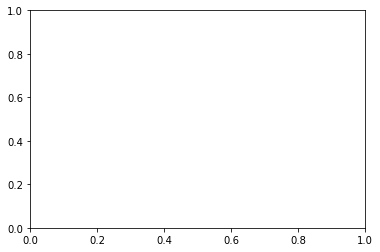

In [89]:
sns.residplot(res.resid)

After looking at the qqplot and the box plot, we can see that the data does not meet the assumptions of normality. 

### 2f)
To further verify the normality assumption, create a histogram for the residuals. Does the histogram look like a normal distribution? 

<AxesSubplot:ylabel='Count'>

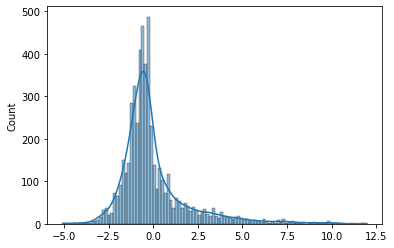

In [62]:
sns.histplot(res.resid, kde = True)

Looking at the histplot, we see that the data is right-skewed and does not appear normally distributed

### 2g)
Test the linearity assumption by creating separate scatter plots for each input variable versus output variable. According to your plots, are the linearity assumptions met? 

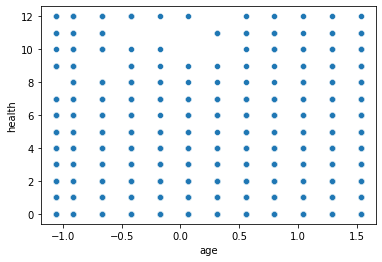

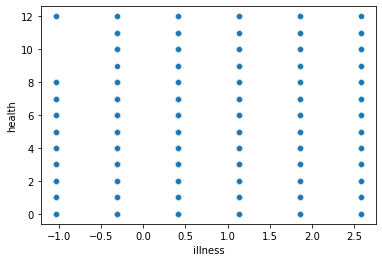

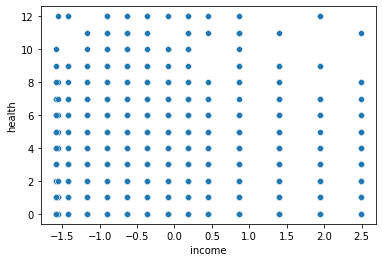

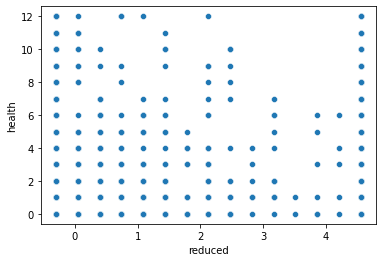

In [67]:
for col in ['age', 'illness', 'income', 'reduced']:
    sns.scatterplot(data = health, x = col, y = 'health')
    plt.show()


No, according to the scatterplots, this does not appear the linearity assumptions have been met.

### 2h)
Extract the predicted output values from the model, then create a scatter plot of the predicted output versus actual output (from the data provided). This plot is also used to evaluate the accuracy of the model. According to the plot, is your model good for predicting health scores? Use the reg.predict() method to extract the predicted values. 

In [68]:
preds = res.predict()

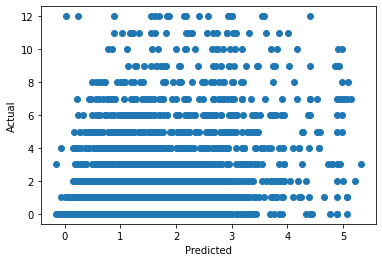

In [72]:
plt.scatter(preds, y)
plt.xlabel(xlabel = 'Predicted')
plt.ylabel(ylabel = 'Actual')
plt.show()

Based on our actual vs predicted, we can see that our model is not good for predicting health scores since we do not see a diagonal line in our scatterplot for actual vs predicted. 

### 3i)
Check for multi-collinearity by generating a covariance matrix for the input data . You can use the .cov() method of pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html). Do you think there is multicollinearity among the input variables? 

In [74]:
pd.DataFrame(X).cov()

,age,income,illness,reduced
age,1.000193,-0.271126,0.205023,0.094763
income,-0.271126,1.000193,-0.148840,-0.047554
illness,0.205023,-0.148840,1.000193,0.218158
reduced,0.094763,-0.047554,0.218158,1.000193


It does not appear that there is multicollinearity among the input variables. 

## Question 3

#### Importing my dataset 

This is a stock market dataset with 516 observations and 5 continuous variables. 

* rfood: excess returns food industry
* rdur: excess returns durables industry
* rcon: excess returns construction industry
* rmrf: excess returns market portfolio
* rf: risk-free return

In [75]:
## Stock market dataset
stock = pd.read_csv("Capm.csv", skipinitialspace = True)

In [76]:
stock.head(5)

,Unnamed: 0,rfood,rdur,rcon,rmrf,rf
0,1,-4.59,0.87,-6.84,-6.99,0.33
1,2,2.62,3.46,2.78,0.99,0.29
2,3,-1.67,-2.28,-0.48,-1.46,0.35
3,4,0.86,2.41,-2.02,-1.70,0.19
4,5,7.34,6.33,3.69,3.08,0.27


In [77]:
# Dropping index column 'Unnamed'
stock.drop(columns = ["Unnamed: 0"], inplace = True)

In [78]:
# Looking at null values
stock.isnull().sum()

rfood    0
rdur     0
rcon     0
rmrf     0
rf       0
dtype: int64

In [79]:
stock.describe()

,rfood,rdur,rcon,rmrf,rf
count,516.00000,516.000000,516.000000,516.000000,516.000000
mean,0.66469,0.525368,0.427752,0.415504,0.473430
std,4.54417,5.795300,5.790244,4.484188,0.220496
min,-18.79000,-25.740000,-29.810000,-23.090000,0.110000
25%,-1.65500,-2.752500,-2.735000,-2.230000,0.320000
50%,0.67500,0.505000,0.470000,0.730000,0.430000
75%,3.50750,4.000000,3.672500,3.422500,0.580000
max,19.56000,19.740000,24.670000,16.050000,1.350000


### 3a) 
Construct a linear regression model using ordinary least squares method by applying the .LinearRegression() constructor in sklearn and find the training and test accuracy of this model using mean square error (mse). 

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [81]:
# Train Test Split with 30%
y = stock['rf']
X = stock.drop('rf', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
#Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)
test_preds = lm.predict(X_test)
train_preds = lm.predict(X_train)
print("MSE of test:", mean_squared_error(y_test, test_preds))
print("MSE of train:", mean_squared_error(y_train, train_preds))

MSE of test: 0.04576821003683135
MSE of train: 0.04902253023212728


### 3b) 
Check for overfitting. Is there overfitting? Support your answer with some results you generated. 

There is overfitting in the dataset. While the test dataset has a slightly lower MSE than the training set, it is still relatively close. Test set has an MSE of 0.0458, while training dataset has MSE of 0.0490 indicating the model is a little more accurate for the test set. 

### 3c) 
Fit a lasso regression on the data and check the training and test accuracy of the model using mse. Use the default alpha or penalty constant

In [83]:
#Lasso Regression Model
las = Lasso()
las.fit(X_train, y_train)
test_preds = las.predict(X_test)
train_preds = las.predict(X_train)
print("MSE of test:", mean_squared_error(y_test, test_preds))
print("MSE of train:", mean_squared_error(y_train, train_preds))

MSE of test: 0.0460742567372723
MSE of train: 0.04976682806301363


### 3d) 
Fit a  regression on the data and check the training and test accuracy of the model using mse. Use the default alpha or penalty constant

In [84]:
#Ridge Regression Model
rdg = Ridge()
rdg.fit(X_train, y_train)
test_preds = rdg.predict(X_test)
train_preds = rdg.predict(X_train)
print("MSE of test:", mean_squared_error(y_test, test_preds))
print("MSE of train:", mean_squared_error(y_train, train_preds))

MSE of test: 0.04576796261314673
MSE of train: 0.0490225302984869


### 3e) 
Which model is better, OLS, Lasso, or Ridge regression? 

The Ridge regression is the better model. It has the lowest MSE out of the three models for the test set. The next best is the OLS Regression Model. 

* Ridge Model
    * MSE of test: 0.04576796261314673
    * MSE of train: 0.0490225302984869   
* OLS Model
    * MSE of test: 0.04576821003683135
    * MSE of train: 0.04902253023212728
* Lasso Model
    * MSE of test: 0.0460742567372723
    * MSE of train: 0.04976682806301363


### 3f) 
Tune the alpha hyperparameters of the lasso and ridge regression using any tuning technique of your choice? What is the best alpha value for the lasso regression and what is the best alpha value for the ridge regression?

In [85]:
from sklearn.model_selection import GridSearchCV

##### Hyperparam tuning for Lasso

In [86]:
new_params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}
grid_las = GridSearchCV(estimator = las, param_grid = new_params, scoring="neg_mean_squared_error")
grid_las.fit(X_train, y_train)
print(grid_las.best_estimator_)

Lasso(alpha=0.01)


##### Hyperparam tuning for Ridge

In [87]:
new_params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}
grid_rdg = GridSearchCV(estimator = rdg, param_grid = new_params, scoring="neg_mean_squared_error")
grid_rdg.fit(X_train, y_train)
print(grid_rdg.best_estimator_)

Ridge(alpha=1)


The best alpha value for the Lasso regression is alpha = 0.01, while the best alpha value for Ridge regression is alpha = 1.